In [2]:
# HIDDEN
from datascience import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import pylab as pl
import math
from scipy import stats

In [3]:
# HIDDEN
# Correlation coefficient

def corr(table, column_A, column_B):
    x = table[column_A]
    y = table[column_B]
    x_su = (x-np.mean(x))/np.std(x)
    y_su = (y-np.mean(y))/np.std(y)
    return np.mean(x_su*y_su)

In [4]:
# HIDDEN
# Slope and intercept of regression line

def regress(table, column_x, column_y):
    r = corr(table, column_x, column_y)
    reg_slope = r*np.std(table[column_y])/np.std(table[column_x])
    reg_int = np.mean(table[column_y]) - reg_slope*np.mean(table[column_x])
    return np.array([reg_slope, reg_int])

In [5]:
# HIDDEN
# Fitted value at x

def fit(table, column_x, column_y, x):
    slope_int = regress(table, column_x, column_y)
    return slope_int[0]*x + slope_int[1]

In [6]:
# HIDDEN
# Fitted values for all points in the scatter

def fitted_values(table, column_x, column_y):
    slope_int = regress(table, column_x, column_y)
    return slope_int[0]*table[column_x] + slope_int[1]

In [7]:
# HIDDEN
# Residuals: Deviations from the regression line,
# for all points in the scatter

def residuals(table, column_x, column_y):
    fitted = fitted_values(table, column_x, column_y)
    return table[column_y] - fitted

In [8]:
# HIDDEN
# Scatter plot with fitted (regression) line

def scatter_fit(table, column_x, column_y):
    plots.scatter(table[column_x], table[column_y], s=10)
    plots.plot(table[column_x], fitted_values(table, column_x, column_y), lw=1, color='green')
    plots.xlabel(column_x)
    plots.ylabel(column_y)

In [9]:
# HIDDEN
# A residual plot

def residual_plot1(table, column_x, column_y):
    plots.scatter(table[column_x], residuals(table, column_x, column_y), s=10)
    xm = np.min(table[column_x])
    xM = np.max(table[column_x])
    plots.plot([xm, xM], [0, 0], color='k', lw=1)
    plots.xlabel(column_x)
    plots.ylabel('residual')

## Assumptions of randomness: a "regression model"

In the last section, we developed the concepts of correlation and regression as ways to describe data. We will now see how these concepts can become powerful tools for inference, when used appropriately.

Questions of inference may arise if we believe that a scatter plot reflects the underlying relation between the two variables being plotted but does not specify the relation completely. For example, a scatter plot of the heights of fathers and sons shows us the precise relation between the two variables in one particular sample of men; but we might wonder whether that relation holds true, or almost true, among all fathers and sons in the population from which the sample was drawn, or indeed among fathers and sons in general.

As always, inferential thinking begins with a careful examination of the assumptions about the data. Sets of assumptions are known as *models*. Sets of assumptions about randomness in roughly linear scatter plots are called *regression models*.

In brief, such models say that the underlying relation between the two variables is perfectly linear; this straight line is the *signal* that we would like to identify. However, we are not able to see the line clearly. What we see are points that are scattered around the line. In each of the points, the signal has been contaminated by *random noise*. Our inferential goal, therefore, is to separate the signal from the noise.

In greater detail, the regression model specifies that the points in the scatter plot are generated at random as follows.

- The relation between $x$ and $y$ is perfectly linear. We cannot see this "true line" but Tyche can. She is the Goddess of Chance.
- Tyche creates the scatter plot by taking points on the line and pushing them off the line vertically, either above or below, as follows:
    - For each $x$, Tyche finds the corresponding point on the true line, and then adds an error.
    - The errors are drawn at random with replacement from a population of errors that has a normal distribution with mean 0.
    - Tyche creates a point whose horizontal coordinate is $x$ and whose vertical coordinate is "the height of the true line at $x$, plus the error".
- Finally, Tyche erases the true line from the scatter, and shows us just the scatter plot of her points.

Based on this scatter plot, how should we estimate the true line? The best line that we can put through a scatter plot is the regression line. So the regression line is a natural estimate of the true line. 

The simulation below shows how close the regression line is to the true line. The first panel shows how Tyche generates the scatter plot from the true line; the second show the scatter plot that we see; the third shows the regression line through the plot; and the fourth shows both the regression line and the true line.

Run the simulation a few times, with different values for the slope and intercept of the true line, and varying sample sizes. You will see that the regression line is a good estimate of the true line if the sample size is moderately large.

In [10]:
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    eps = np.random.normal(0, 6, sample_size)
    y = (true_slope*x + true_int) + eps
    tyche = Table([x,y],['x','y'])

    plots.figure(figsize=(6, 16))
    plots.subplot(4, 1, 1)
    plots.scatter(tyche['x'], tyche['y'], s=10)
    plots.plot(xlims, true_slope*xlims + true_int, lw=1, color='gold')
    plots.title('What Tyche draws')

    plots.subplot(4, 1, 2)
    plots.scatter(tyche['x'],tyche['y'], s=10)
    plots.title('What we get to see')

    plots.subplot(4, 1, 3)
    scatter_fit(tyche, 'x', 'y')
    plots.xlabel("")
    plots.ylabel("")
    plots.title('Regression line: our estimate of true line')

    plots.subplot(4, 1, 4)
    scatter_fit(tyche, 'x', 'y')
    xlims = np.array([np.min(tyche['x']), np.max(tyche['x'])])
    plots.plot(xlims, true_slope*xlims + true_int, lw=1, color='gold')
    plots.title("Regression line and true line")

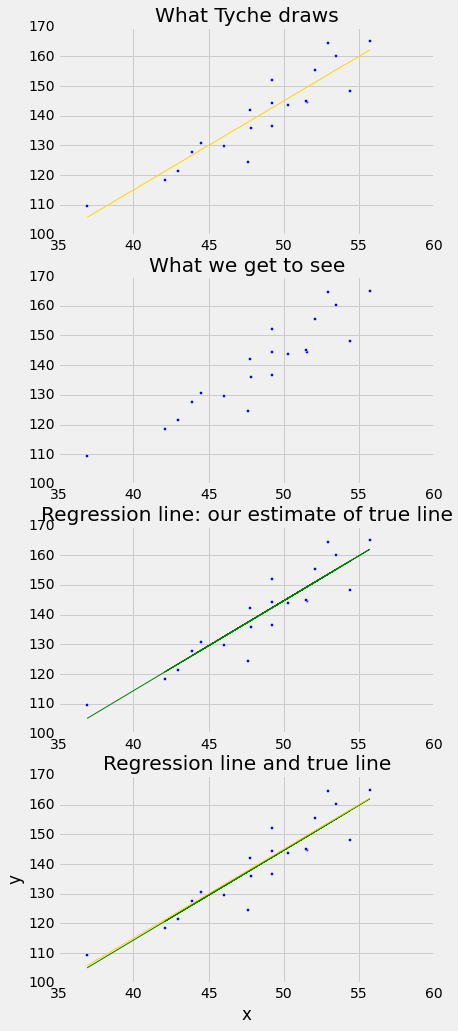

In [11]:
# Tyche's true line,
# the points she creates,
# and our estimate of the true line.
# Arguments: true slope, true intercept, number of points

draw_and_compare(3, -5, 20)

In reality, of course, we are not Tyche, and we will never see the true line. What the simulation shows that if the regression model looks plausible, and we have a large sample, then regression line is a good approximation to the true line.

Here is an example where regression model can be used to make predictions.

The data are a subset of the information gathered in a randomized controlled trial about treatments for Hodgkin's disease. Hodgkin's disease is a cancer that typically affects young people. The disease is curable but the treatment is very harsh. The purpose of the trial was to come up with dosage that would cure the cancer but minimize the adverse effects on the patients. 

This table ``hodgkins`` contains data on the effect that the treatment had on the lungs of 22 patients. The columns are:

- Height in cm
- A measure of radiation to the mantle (neck, chest, under arms)
- A measure of chemotherapy
- A score of the health of the lungs at baseline, that is, at the start of the treatment; higher scores correspond to more healthy lungs
- The same score of the health of the lungs, 15 months after treatment

In [12]:
hodgkins = Table.read_table('hodgkins.csv')
hodgkins.show()

height,rad,chemo,base,month15
164,679,180,160.57,87.77
168,311,180,98.24,67.62
173,388,239,129.04,133.33
157,370,168,85.41,81.28
160,468,151,67.94,79.26
170,341,96,150.51,80.97
163,453,134,129.88,69.24
175,529,264,87.45,56.48
185,392,240,149.84,106.99
178,479,216,92.24,73.43


It is evident that the patients' lungs were less healthy 15 months after the treatment than at baseline. At 36 months, they did recover most of their lung function, but those data are not part of this table.

The scatter plot below shows that taller patients had higher scores at 15 months. 

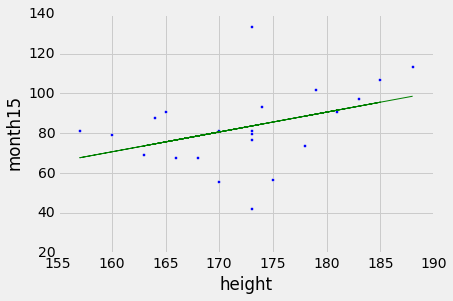

In [13]:
scatter_fit(hodgkins, 'height', 'month15')

###Prediction
The scatter plot looks roughly linear. Let us assume that the regression model holds. Under that assumption, the regression line can be used to predict the 15-month score of a new patient, based on the patient's height. The prediction will be good provided the assumptions of the regression model are justified for these data, and provided the new patient is similar to those in the study.

The function ``regress`` gives us the slope and intercept of the regression line. To predict the 15-month score of a new patient whose height is $x$ cm, we use the following calculation:

Predicted 15-month score of a patient who is $x$ inches tall
$~=~$ slope$\;\times\;x ~+~$ intercept

The predicted 15-month score of a patient who is 173 cm tall is 83.66 cm, and that of a patient who is 163 cm tall is 73.69 cm.

In [14]:
# slope and intercept
slope_int = regress(hodgkins, 'height', 'month15')
slope_int

array([  0.99626375, -88.69663156])

In [15]:
# New patient, 173 cm tall
# Predicted 15-month score:

slope_int[0]*173 + slope_int[1]

83.65699801460444

In [16]:
# New patient, 163 cm tall
# Predicted 15-month score:

slope_int[0]*163 + slope_int[1]

73.694360467072741

## The Variability of the Prediction

As data scientists working under the regression model, we know that the sample might have been different. Had the sample been different, the regression line would have been different too, and so would our prediction. To see how good our prediction is, we must get a sense of how variable the prediction can be.

One way to do this would be by generating new random samples of points and making a prediction based on each new sample. To generate new samples, we can **bootstrap the scatter plot**.

Specifically, we can simulate new samples by random sampling with replacement from the original scatter plot, as many times as there are points in the scatter.

Here is the original scatter diagram from the sample, and four replications of the bootstrap resampling procedure. Notice how the resampled scatter plots are in general a little more sparse than the original. That is because some of the original point do not get selected in the samples.

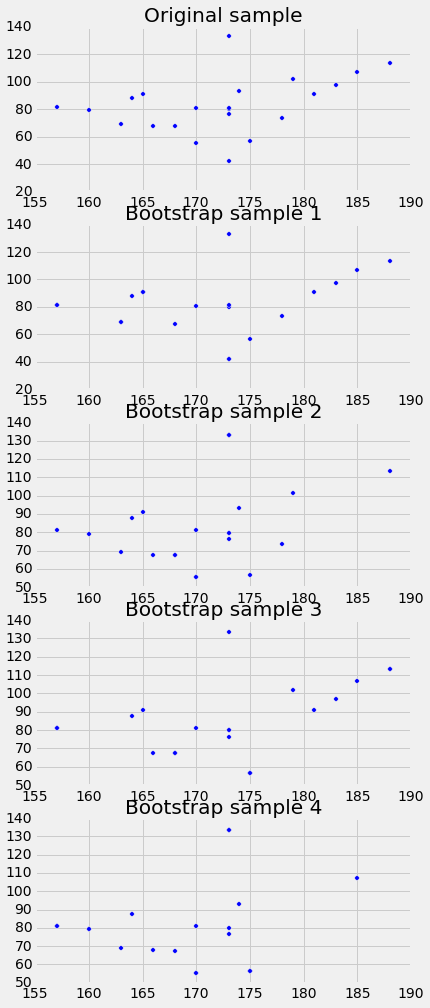

In [17]:
plots.figure(figsize=(6, 16))
plots.subplot(5, 1, 1)
plots.scatter(hodgkins['height'], hodgkins['month15'])
plots.title('Original sample')

plots.subplot(5,1,2)
rep = hodgkins.sample(with_replacement=True)
plots.scatter(rep['height'], rep['month15'])
plots.title('Bootstrap sample 1')

plots.subplot(5, 1, 3)
rep = hodgkins.sample(with_replacement=True)
plots.scatter(rep['height'], rep['month15'])
plots.title('Bootstrap sample 2')

plots.subplot(5, 1, 4)
rep = hodgkins.sample(with_replacement=True)
plots.scatter(rep['height'], rep['month15'])
plots.title('Bootstrap sample 3')

plots.subplot(5, 1, 5)
rep = hodgkins.sample(with_replacement=True)
plots.scatter(rep['height'], rep['month15'])
plots.title('Bootstrap sample 4')
None

The next step is to fit the regression line to the scatter plot in each replication, and make a prediction based on each line. The figure below shows 10 such lines, and the corresponding predicted 15-month scores for a patient whose height is 173 cm.

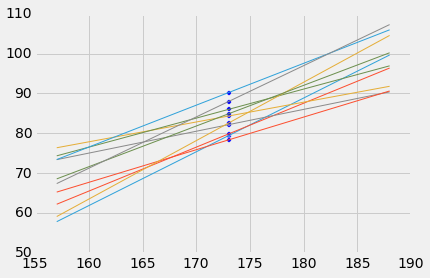

In [18]:
x = 173

h = hodgkins['height']
m15 = hodgkins['month15']
xlims = np.array([np.min(h), np.max(h)])

results = Table([[],[]], ['slope','intercept'])
for i in range(10):
    rep = hodgkins.sample(with_replacement=True)
    results.append(Table.from_rows([regress(rep, 'height','month15')], ['slope','intercept']))
results['prediction at x='+str(x)] = results['slope']*x + results['intercept']

left = xlims[0]*results['slope'] + results['intercept']
right = xlims[1]*results['slope'] + results['intercept']
fit_x = x*results['slope'] + results['intercept']

for i in range(10):
    plots.plot(xlims, np.array([left[i], right[i]]), lw=1)
    plots.scatter(x, fit_x[i])

The table below shows the slope and intercept of each of the 10 lines, along with the prediction. 

In [405]:
results

slope,intercept,prediction at x=173
0.302312,19.2218,71.5218
0.82256,-59.5651,82.7378
0.680512,-42.3011,75.4275
0.622213,-28.2055,79.4373
1.01322,-94.2791,81.008
0.964129,-84.2893,82.505
0.553561,-17.8059,77.9602
1.03424,-99.4017,79.522
0.993966,-98.402,73.554
0.938993,-73.1735,89.2723


##Bootstrap prediction interval

If we increase the number of repetitions of the resampling process, we can generate an empirical histogram of the predictions. This will allow us to create a prediction interval, by the same methods that we used earlier to create bootstrap confidence intervals for numerical parameters.

In [406]:
# Bootstrap prediction at new_x
# Hodgkin's disease table, x = height, y = month15

def bootstrap_ht_m15(new_x, repetitions):
    
    # For each repetition:
    # Bootstrap the scatter; 
    # get the regression prediction at new_x; 
    # augment the predictions list
    pred = []
    for i in range(repetitions):
        bootstrap_sample = hodgkins.sample(with_replacement=True)
        p = fit(bootstrap_sample, 'height', 'month15', new_x)
        pred.append(p)
    
    # Prediction based on original sample
    obs = fit(hodgkins, 'height', 'month15', new_x)
    
    # Display results
    pred = Table([pred], ['pred'])
    pred.hist(bins=np.arange(55,100,2), normed=True)
    plots.ylim(0, 0.1)
    plots.xlabel('predictions at x='+str(new_x))
    print('Height of regression line at x='+str(new_x)+':', obs)
    print('Approximate 95%-confidence interval:')
    print((pred.percentile(2.5).rows[0][0], pred.percentile(97.5).rows[0][0]))

Height of regression line at x=173: 83.6569980146
Approximate 95%-confidence interval:
(74.714778270509967, 91.42206150583246)


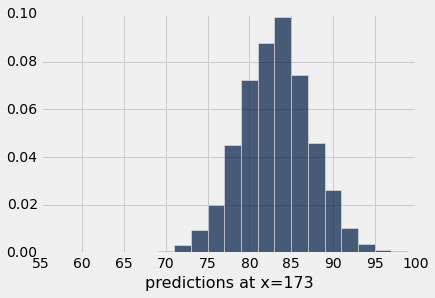

In [407]:
bootstrap_ht_m15(173, 5000)

The figure above shows a bootstrap empirical histogram of the predicted 15-month score of a patient who is 173 cm tall. The empirical distribution is roughly normal. An approximate 95% prediction interval of scores ranges from about 74.7 to about 91.4. The prediction based on the original sample was about 83.6, which is close to the center of the interval.

The figure below shows the corresponding figure for a patient whose height is 163 cm. Notice that while this empirical histogram too is roughly bell shaped, the approximation is not as good as the one above for a given height of 173 cm. Also, the distribution is more spread out than the one above. That is because 163 cm is near the low end of the heights of the sampled patients, and there is not much data around a height of 163 cm. By contrast, several patients were 173 cm tall. Therefore we can make better predictions for patients who are 173 cm tall than for patients whose height is 163 cm.

Height of regression line at x=163: 73.6943604671
Approximate 95%-confidence interval:
(61.330870268521551, 82.356639766521468)


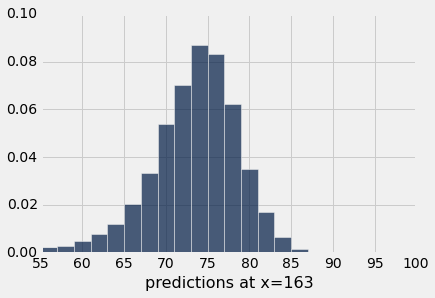

In [408]:
bootstrap_ht_m15(163, 5000)

The function ``bootstrap_pred`` returns an approximate 95% prediction interval and a bootstrap empirical distribution of the prediction. Its arguments are:

- the name of the table containing the data
- the label of the column containing the known variable, $x$
- the label of the column containing the variable to be predicted, $y$
- the value of $x$ at which to make the prediction
- the number of repetitions of the bootstrap resampling procedure

In every repetition, the function draws a bootstrap sample and finds the fitted value at the specified value of $x$. Below, the function has been called to make a prediction at a height of 180 cm. 

In [29]:
def bootstrap_pred(table, column_x, column_y, new_x, repetitions):
    
    # For each repetition:
    # Bootstrap the scatter; 
    # get the regression prediction at new_x 
    # augment the predictions list
    pred = []
    for i in range(repetitions):
        bootstrap_sample = table.sample(with_replacement=True)
        p = fit(bootstrap_sample, column_x, column_y, new_x)
        pred.append(p)
    
    # Prediction based on regression line through original sample
    obs = fit(table, column_x, column_y, new_x)
    
    # Display results
    pred = Table([pred], ['pred'])
    pred.hist(bins=20, normed=True)
    plots.xlabel('predictions at x='+str(new_x))
    print('Height of regression line at x='+str(new_x)+':', obs)
    print('Approximate 95%-confidence interval:')
    print((pred.percentile(2.5).rows[0][0], pred.percentile(97.5).rows[0][0]))

Height of regression line at x=180: 90.6308442979
Approximate 95%-confidence interval:
(78.368435768539257, 99.266211225997026)


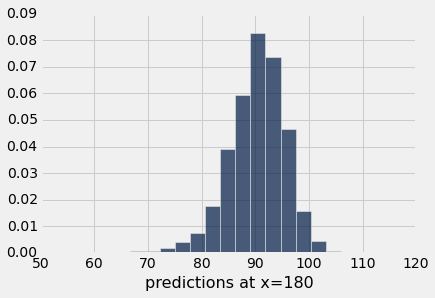

In [32]:
bootstrap_pred(hodgkins, 'height', 'month15', 180, 5000)

## Is there a linear trend at all?
The bootstrap method can also be used to see whether there is any correlation between two variables.

From the scatter plot below, it appears that there is little or no correlation between the amont of radiation patients received and their 15-month score

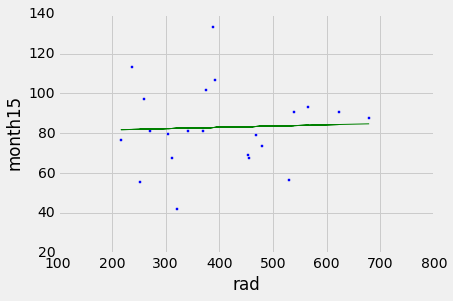

In [411]:
scatter_fit(hodgkins, 'rad', 'month15')

To see whether this lack of linear relation is true, we can create a bootstrap confidence interval for the slope of the true line, analogously to the confidence intervals we constructed in earlier sections using the bootstrap percentile method. 

The figure below shows the empirical distribution of the slopes and an approximate 95% confidence interval for the true slope. The interval runs from about -0.05 to 0.05, and contains the slope of 0. There is no strong reason to doubt that the slope of the true line is around 0.

In [33]:
def bootstrap_slope(table, column_x, column_y, repetitions):
    
    # For each repetition:
    # Bootstrap the scatter, get the slope of the regression line,
    # augment the results list
    slopes = []
    for i in range(repetitions):
        bootstrap_sample = table.sample(with_replacement=True)
        slopes.append(regress(bootstrap_sample, column_x, column_y)[0])
    
    # Slope of the regression line from the original sample
    obs = regress(table, column_x, column_y)[0]
    
    # Display results
    slopes = Table([slopes],['slopes'])
    slopes.hist(bins=20, normed=True)
    plots.xlabel('slopes')
    print('Slope of regression line:', obs)
    print('Approximate 95%-confidence interval:')
    print((slopes.percentile(2.5).rows[0][0], slopes.percentile(97.5).rows[0][0]))

Slope of regression line: 0.00640027743724
Approximate 95%-confidence interval:
(-0.054477794919830333, 0.057351221017303319)


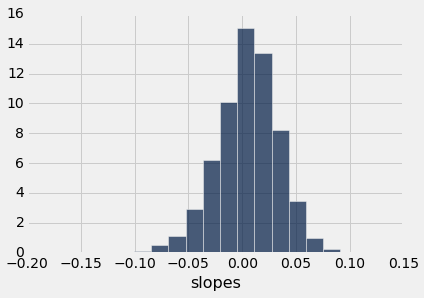

In [413]:
bootstrap_slope(hodgkins, 'rad', 'month15', 5000)